# Williams_Lake_EQ_Centre_bettle_survey_june252016_analysis
- looking to use Machine Learning to "find" local current attack features in survey images
- once found
  - locate in image
  - convert to x,y of photo
  - convert x,y to lat/lon
  - list in table of current attack locations to be ground truthed and managed

## Steps:
- tag RGB photos in digikam
  - no_attack
  - current_attack
  - old_attack
- build catalogue of local current attack feature images for training & testing
  - use GIMP to select out current attack tree images
    - save with original image name + feature centre xy pixel address

### notes & ideas
- locate suspected attack features with rgb & gray-scale images
- sift through nir images to find same features via geolocation
- calculate NVDI on features
- ? am I getting this reversed, aka need to use NVDI to locate possible early attack features

- alternative route:  stitch RGB & NIR gelocated images, then run NVDI on whole survey image
  - ? memory use of this large an image
  - ? could the stiched image then be recarved back up into tiles that exactly overlay RGB & NIR data
  
- are there attack features in the view?
  - isolate by colour or colour differential, then density pattern
  - see spectral analysis

In [1]:
import numpy as np
import mahotas as mh
from pylab import imshow
# import sklearn as skl

ImportError: No module named 'mahotas'

### Display example images for reference

Williams Lake, Eagle View north above Equestrian Centre
see catalogue.txt for current attack RGB image & current attack NIR image listings

In [82]:
# non-attack image
image_rgb_no_attack = ('/home/pms/Documents/GeoVisionEnvironmental/KartographicServices/drone_surveying/surveys/BC/'
                       'williams_lake_eagle_view_eq_centre_north_survey_june25201616350102/photos/'
                       'mapir_rgb.working/attack_none/2016_0626_002218_406.JPG')

# current attack image
image_rgb_current_attack = ('/home/pms/Documents/GeoVisionEnvironmental/KartographicServices/drone_surveying/surveys/BC/'
                            'williams_lake_eagle_view_eq_centre_north_survey_june25201616350102/photos'
                            'mapir_rgb.working/attack_current/2016_0626_001750_256.JPG')
image_nir_current_attack = ('/home/pms/Documents/GeoVisionEnvironmental/KartographicServices/drone_surveying/surveys/BC/'
                            'williams_lake_eagle_view_eq_centre_north_survey_june25201616350102/photos'
                            'mapir_nir.working/2016_0626_001750_258.JPG')


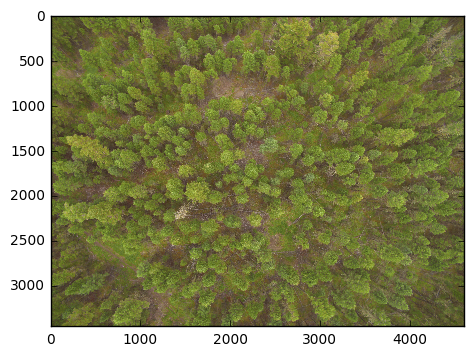

In [76]:
# import general non-attack rgb image
image = image_rgb_no_attack
image_rgb = mh.imread(image)
# display the image
from matplotlib import pyplot as plt
plt.imshow(image_rgb)
plt.show()

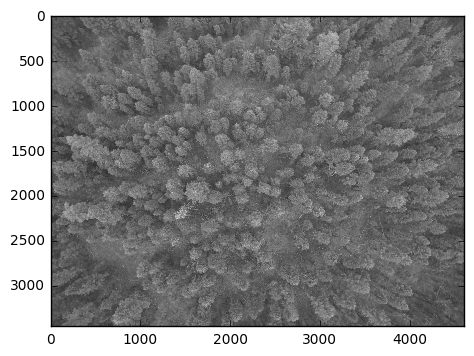

In [70]:
# create image as gray scale
# http://stackoverflow.com/questions/12201577/how-can-i-convert-an-rgb-image-into-grayscale-in-python
# this throws "AttributeError: 'str' object has no attribute 'ndim'" error
# image_gs = mh.colors.rgb2gray(image) #, dtype=np.uint8)
# used Pillow instead
from PIL import Image
image_gs = Image.open(image).convert('LA')
plt.imshow(image_gs)
plt.show()

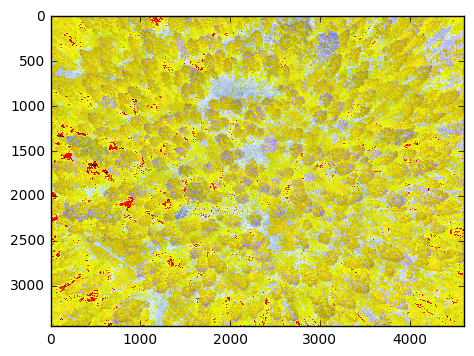

In [71]:
# create image filtered for mean
image_rgb_mean = image_rgb - image_rgb.mean()
plt.imshow(image_rgb_mean)
plt.show()

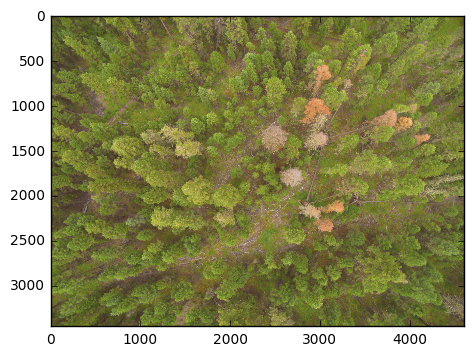

In [81]:
# import general current-attack rgb image
image = image_rgb_current_attack
image_rgb = mh.imread(image)
# display the image
from matplotlib import pyplot as plt
plt.imshow(image_rgb)
plt.show()

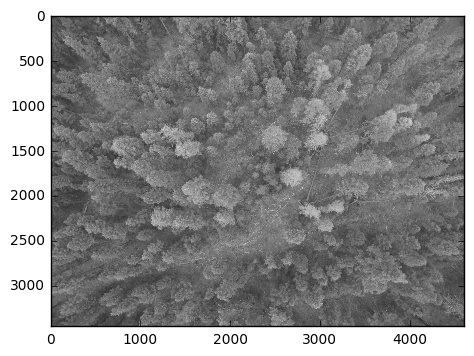

In [73]:
# create image as gray scale
# http://stackoverflow.com/questions/12201577/how-can-i-convert-an-rgb-image-into-grayscale-in-python
# this throws "AttributeError: 'str' object has no attribute 'ndim'" error
# image_gs = mh.colors.rgb2gray(image) #, dtype=np.uint8)
from PIL import Image
image_gs = Image.open(image).convert('LA')
plt.imshow(image_gs)
plt.show()

- Filtering for the mean seems to highlight old & current attack trees 
- Strips the live tree rgb information?
- Could one then apply a density filter on defined features?

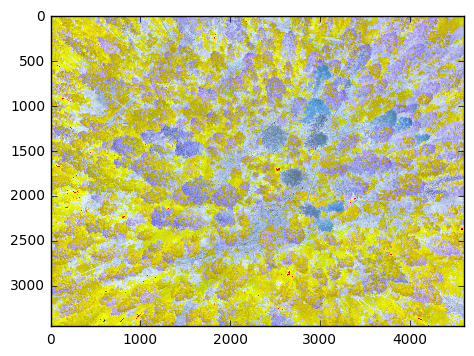

In [74]:
# create image filtered for mean
image_rgb_mean = image_rgb - image_rgb.mean()
plt.imshow(image_rgb_mean)
plt.show()

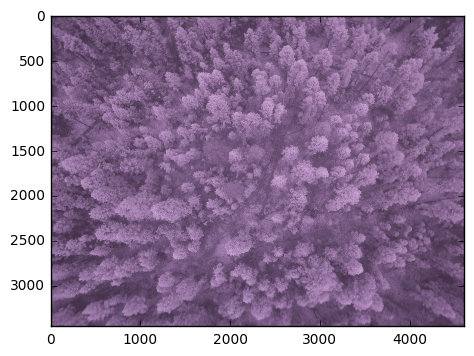

In [77]:
# import general current-attack nir image
image = image_nir_current_attack
image_nir = mh.imread(image)
# display the image
from matplotlib import pyplot as plt
plt.imshow(image_nir)
plt.show()

### Pattern recognition to locate current attack trees
Steps:
- follow Caffe tutorial from Berkeley Vision Learning Centre
  - https://github.com/BVLC/caffe


# local feature representation
from mahotas.features import surf
#descriptors = surf.dense(image_gs, spacing=16)
spoints = surf.surf(image_gs)
label = 'Nr Points:'
print (label, len(spoints))

Extract features from images

    idea is to extract individual trees in image, then compare to known attacked tree feature for training

In [ ]:
# http://www.learnopencv.com/blob-detection-using-opencv-python-c/
# Standard imports
# CV2 is installed
import cv2
import numpy as np;

# Read image
image = cv2.imread("image_rgb_current_attack", cv2.IMREAD_GRAYSCALE)

# Set up the detector with default parameters.
detector = cv2.SimpleBlobDetector()

# Detect blobs.
keypoints = detector.detect(image)

# Draw detected blobs as red circles.
# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures the size of the circle corresponds to the size of blob
image_with_keypoints = cv2.drawKeypoints(image, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Show keypoints
cv2.imshow("Keypoints", image_with_keypoints)
cv2.waitKey(0)